In [63]:
# Data analysis libraries
import pandas as pd
import numpy as np
import os

import warnings
warnings.filterwarnings("ignore")
from IPython.display import display
pd.options.display.max_columns = None

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette("Set1")

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

# Using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected=True)

# Initiate plotly
init_notebook_mode(connected=True) #do not miss this line

In [64]:
#Set working directory
os.chdir("C:/Users/singhsahab/Desktop/Assignment_Algoscale")

In [65]:
os.getcwd()

'C:\\Users\\singhsahab\\Desktop\\Assignment_Algoscale'

In [66]:
#Load Data
reviews_raw = pd.read_csv("train.csv")

In [67]:
# Best Practice: Make a copy of the raw data to work on
reviews = reviews_raw.copy()

In [12]:
reviews.head()

,index,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review/timeStruct,review/timeUnix,user/ageInSeconds,user/birthdayRaw,user/birthdayUnix,user/gender,user/profileName
0,40163,5.0,46634,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...,"{'min': 38, 'hour': 3, 'mday': 16, 'sec': 10, ...",1229398690,NaN,NaN,NaN,NaN,RblWthACoz
1,8135,11.0,3003,395,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...,"{'min': 38, 'hour': 23, 'mday': 8, 'sec': 58, ...",1218238738,NaN,NaN,NaN,NaN,BeerSox
2,10529,4.7,961,365,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...,"{'min': 7, 'hour': 18, 'mday': 26, 'sec': 2, '...",1101492422,NaN,NaN,NaN,Male,mschofield
3,44610,4.4,429,1,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...,"{'min': 7, 'hour': 1, 'mday': 20, 'sec': 5, 'y...",1308532025,1.209827e+09,"Aug 10, 1976",208508400.0,Male,molegar76
4,37062,4.4,4904,1417,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...,"{'min': 51, 'hour': 6, 'mday': 12, 'sec': 48, ...",1299912708,NaN,NaN,NaN,NaN,Brewbro000


# Exploratory Data  Analysis

In [68]:
## Examine structure
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 19 columns):
index                37500 non-null int64
beer/ABV             37500 non-null float64
beer/beerId          37500 non-null int64
beer/brewerId        37500 non-null int64
beer/name            37500 non-null object
beer/style           37500 non-null object
review/appearance    37500 non-null float64
review/aroma         37500 non-null float64
review/overall       37500 non-null float64
review/palate        37500 non-null float64
review/taste         37500 non-null float64
review/text          37490 non-null object
review/timeStruct    37500 non-null object
review/timeUnix      37500 non-null int64
user/ageInSeconds    7856 non-null float64
user/birthdayRaw     7856 non-null object
user/birthdayUnix    7856 non-null float64
user/gender          15314 non-null object
user/profileName     37495 non-null object
dtypes: float64(8), int64(4), object(7)
memory usage: 5.4+ MB


In [69]:
# Convert 'object' to 'category' 
reviews[reviews.select_dtypes(['object']).columns] = reviews.select_dtypes(['object']).\
                                                         apply(lambda x: x.astype('category'))

In [17]:
## Examine structure
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 19 columns):
index                37500 non-null int64
beer/ABV             37500 non-null float64
beer/beerId          37500 non-null int64
beer/brewerId        37500 non-null int64
beer/name            37500 non-null category
beer/style           37500 non-null category
review/appearance    37500 non-null float64
review/aroma         37500 non-null float64
review/overall       37500 non-null float64
review/palate        37500 non-null float64
review/taste         37500 non-null float64
review/text          37490 non-null category
review/timeStruct    37500 non-null category
review/timeUnix      37500 non-null int64
user/ageInSeconds    7856 non-null float64
user/birthdayRaw     7856 non-null category
user/birthdayUnix    7856 non-null float64
user/gender          15314 non-null category
user/profileName     37495 non-null category
dtypes: category(7), float64(8), int64(4)
memory usage: 7.6

In [70]:
reviews.describe()

,index,beer/ABV,beer/beerId,beer/brewerId,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/timeUnix,user/ageInSeconds,user/birthdayUnix
count,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000,37500.00000,37500.000000,37500.000000,3.750000e+04,7.856000e+03,7.856000e+03
mean,24951.887573,7.403725,21861.152027,3036.595120,3.900053,3.873240,3.88944,3.854867,3.922440,1.232794e+09,1.176705e+09,2.416303e+08
std,14434.009669,2.318145,18923.130832,5123.084675,0.588778,0.680865,0.70045,0.668068,0.716504,7.190955e+07,3.375514e+08,3.375514e+08
min,0.000000,0.100000,175.000000,1.000000,0.000000,1.000000,0.00000,1.000000,1.000000,9.262944e+08,7.034366e+08,-2.208960e+09
25%,12422.500000,5.400000,5441.000000,395.000000,3.500000,3.500000,3.50000,3.500000,3.500000,1.189194e+09,9.794810e+08,1.433628e+08
50%,24942.500000,6.900000,17538.000000,1199.000000,4.000000,4.000000,4.00000,4.000000,4.000000,1.248150e+09,1.100009e+09,3.183264e+08
75%,37416.750000,9.400000,34146.000000,1315.000000,4.500000,4.500000,4.50000,4.500000,4.500000,1.291330e+09,1.274973e+09,4.388544e+08
max,49999.000000,57.700000,77207.000000,27797.000000,5.000000,5.000000,5.00000,5.000000,5.000000,1.326267e+09,3.627295e+09,7.148988e+08


# Missing Data

# Null check

In [71]:
# Null Check 
# Check for null values
print(reviews.isnull().sum())

index                    0
beer/ABV                 0
beer/beerId              0
beer/brewerId            0
beer/name                0
beer/style               0
review/appearance        0
review/aroma             0
review/overall           0
review/palate            0
review/taste             0
review/text             10
review/timeStruct        0
review/timeUnix          0
user/ageInSeconds    29644
user/birthdayRaw     29644
user/birthdayUnix    29644
user/gender          22186
user/profileName         5
dtype: int64


In [19]:
# Percent of data missing `beer_abv` values
print("Percent Null Values of `beer_abv` column:", round(67785 / 1586614 * 100, 2),"%")

Percent Null Values of `beer_abv` column: 4.27 %


In [72]:
# Drop null row values
reviews = reviews.dropna()
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7709 entries, 3 to 37492
Data columns (total 19 columns):
index                7709 non-null int64
beer/ABV             7709 non-null float64
beer/beerId          7709 non-null int64
beer/brewerId        7709 non-null int64
beer/name            7709 non-null category
beer/style           7709 non-null category
review/appearance    7709 non-null float64
review/aroma         7709 non-null float64
review/overall       7709 non-null float64
review/palate        7709 non-null float64
review/taste         7709 non-null float64
review/text          7709 non-null category
review/timeStruct    7709 non-null category
review/timeUnix      7709 non-null int64
user/ageInSeconds    7709 non-null float64
user/birthdayRaw     7709 non-null category
user/birthdayUnix    7709 non-null float64
user/gender          7709 non-null category
user/profileName     7709 non-null category
dtypes: category(7), float64(8), int64(4)
memory usage: 4.5 MB


In [21]:
# Check for null values
print(reviews.isnull().sum())

index                0
beer/ABV             0
beer/beerId          0
beer/brewerId        0
beer/name            0
beer/style           0
review/appearance    0
review/aroma         0
review/overall       0
review/palate        0
review/taste         0
review/text          0
review/timeStruct    0
review/timeUnix      0
user/ageInSeconds    0
user/birthdayRaw     0
user/birthdayUnix    0
user/gender          0
user/profileName     0
dtype: int64


# Duplicate data

In [73]:
#Duplicate Data 
# Sort by user overall rating first
reviews = reviews.sort_values('review/overall', ascending=False)

# Keep the highest rating from each user and drop the rest 
reviews = reviews.drop_duplicates(subset= ['user/profileName','beer/name'], keep='first')

# Peep structure
reviews.info()

# Percent of data that are duplicates
print("Percent of Duplicate Values:", round((1518478 - 1496263)/ 1518478 * 100, 2),"%")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7657 entries, 18824 to 11836
Data columns (total 19 columns):
index                7657 non-null int64
beer/ABV             7657 non-null float64
beer/beerId          7657 non-null int64
beer/brewerId        7657 non-null int64
beer/name            7657 non-null category
beer/style           7657 non-null category
review/appearance    7657 non-null float64
review/aroma         7657 non-null float64
review/overall       7657 non-null float64
review/palate        7657 non-null float64
review/taste         7657 non-null float64
review/text          7657 non-null category
review/timeStruct    7657 non-null category
review/timeUnix      7657 non-null int64
user/ageInSeconds    7657 non-null float64
user/birthdayRaw     7657 non-null category
user/birthdayUnix    7657 non-null float64
user/gender          7657 non-null category
user/profileName     7657 non-null category
dtypes: category(7), float64(8), int64(4)
memory usage: 4.5 MB
Percent o

# overview of Numeric feature

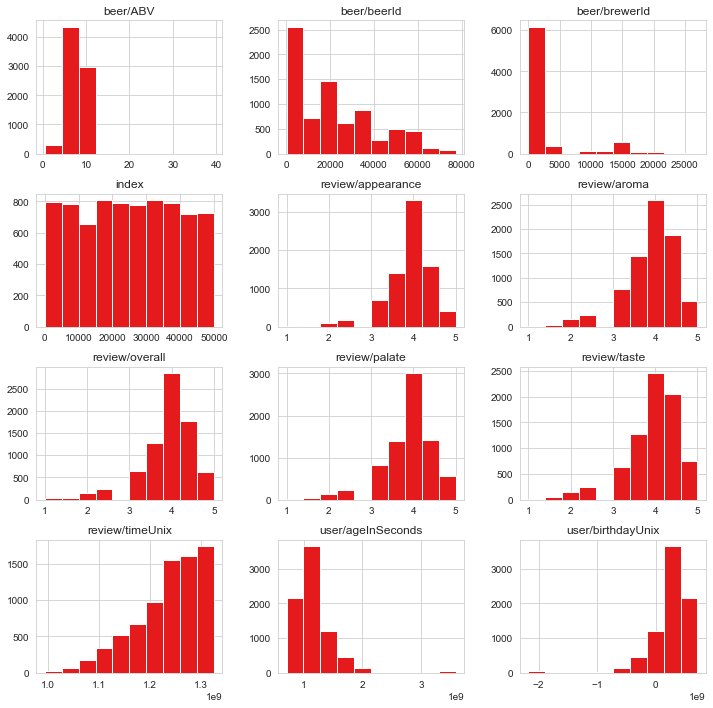

In [74]:
# Histogram of all numeric features
reviews.hist(figsize=(12,12))
plt.show()

# Ratings of 0
since ratings are on a scale of 1-5, any values in review variables that are less than 1 are not suitable for analysis.
However, it's always a good idea to check for numbers which don't make sense in your dataset.

In [75]:
# Review scores of >= 1
reviews = reviews[(reviews['review/overall'] >= 1) | \
        (reviews['review/appearance'] >= 1)]

In [76]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7657 entries, 18824 to 11836
Data columns (total 19 columns):
index                7657 non-null int64
beer/ABV             7657 non-null float64
beer/beerId          7657 non-null int64
beer/brewerId        7657 non-null int64
beer/name            7657 non-null category
beer/style           7657 non-null category
review/appearance    7657 non-null float64
review/aroma         7657 non-null float64
review/overall       7657 non-null float64
review/palate        7657 non-null float64
review/taste         7657 non-null float64
review/text          7657 non-null category
review/timeStruct    7657 non-null category
review/timeUnix      7657 non-null int64
user/ageInSeconds    7657 non-null float64
user/birthdayRaw     7657 non-null category
user/birthdayUnix    7657 non-null float64
user/gender          7657 non-null category
user/profileName     7657 non-null category
dtypes: category(7), float64(8), int64(4)
memory usage: 4.5 MB


# Feature selection 
Which of the factors (aroma, taste, appearance, palette) are most important in determining the overall quality of a beer?

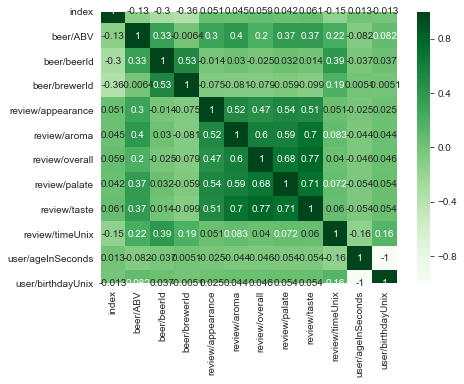

In [78]:
reviews_corr = reviews
#Set the width and height of the plot
f, ax = plt.subplots(figsize=(7, 5))
#Generate correlation matrix
corr = reviews_corr.corr()
#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap='Greens',
            square=True,annot= True, ax=ax)
# Dark shades represents positive correlation while lighter shades represents negative correlation.

In [79]:
#Correlation with Target
# Method 1 - Heatmap: Pandas
# List of numeric factors to include
factors = ["review/appearance","review/aroma","review/palate","review/taste", "review/overall"]

# Create a correlation matrix 
corr_metrics = reviews[factors].corr()
corr_metrics.style.background_gradient(cmap='Blues')

,review/appearance,review/aroma,review/palate,review/taste,review/overall
review/appearance,1,0.523297,0.538732,0.510861,0.466908
review/aroma,0.523297,1,0.59328,0.700917,0.596534
review/palate,0.538732,0.59328,1,0.714207,0.676875
review/taste,0.510861,0.700917,0.714207,1,0.770479
review/overall,0.466908,0.596534,0.676875,0.770479,1


In [39]:
# Method 2 - Heatmap: Plotly
heat_map_plotly = ff.create_annotated_heatmap(
    z=corr_metrics.values,
    x=list(corr_metrics.columns),
    y=list(corr_metrics.index),
    annotation_text=corr_metrics.round(2).values,
    showscale=True,
    colorscale='Portland',
    font_colors=['white','white'])

layout = go.Layout(title="Correlation Heatmap",
                   margin = dict(l = 330))

fig = go.Figure(data=heat_map_plotly, layout=layout)
py.offline.iplot(fig)

# Feature Scaling

# PCA
Although PCA is used mainly for dimensionality reduction, it can also be used to see how many variables explain a given amount of variance.

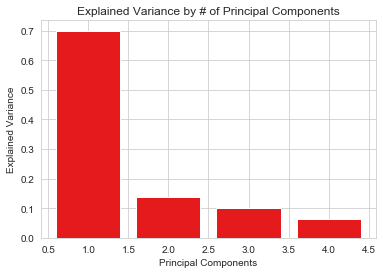

[0.69959109 0.13668231 0.10171172 0.06201488]


In [80]:
# Normalization
# Define our features 
factors = ["review/appearance","review/aroma","review/palate","review/taste"]
features = reviews[factors]

# Define our labels
labels = reviews['review/overall']

# Import the StandardScaler
from sklearn.preprocessing import StandardScaler

# Scale the features and set the values to a new variable
scaler = StandardScaler()
scaled_train_features = scaler.fit_transform(features)

# Note the five features
#print(features.head())

# Note that scaled_train_features are arrays
#print(scaled_train_features)

# Import PCA class
from sklearn.decomposition import PCA

# Get our explained variance ratios from PCA using all features
pca = PCA()
pca.fit(scaled_train_features)
exp_variance = pca.explained_variance_ratio_

# plot the explained variance using a barplot
fig, ax = plt.subplots()
ax.bar(range(1, 5), exp_variance) # Use the number of features 
ax.set_xlabel('Principal Components')
ax.set_title('Explained Variance by # of Principal Components')
ax.set_ylabel('Explained Variance')
plt.show()
print(pca.explained_variance_ratio_)

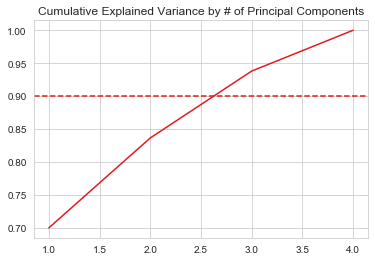

In [81]:
# Calculate the cumulative explained variance
cum_exp_variance = np.cumsum(exp_variance)

# Plot the cumulative explained variance and draw a dashed line at 0.90.
fig, ax = plt.subplots()
ax.plot(range(1, 5), cum_exp_variance)
ax.axhline(y=0.9, linestyle='--')
plt.title('Cumulative Explained Variance by # of Principal Components')
plt.show()

In [46]:
 #Bar plot 
p1 = dict(
    type='bar',
    x=['PC %s' %i for i in range(1,6)],
    y=exp_variance,
    opacity=0.7, 
    marker=dict(color='rgb(1, 87, 155)'),
    name='Individual'
)

# Scatter plot
p2 = dict(
    type='scatter',
    x=['PC %s' %i for i in range(1,6)], 
    y=cum_exp_variance,
    marker=dict(color='rgb(255, 82, 82)'),
    name='Cumulative'
)

data = [p1, p2]

layout=dict(
    title='Explained Variance by Number of Principal Components',
    yaxis=dict(
        title='Explained Variance',
        tickformat="%",
        hoverformat = '.1%'),
    margin = dict(r = 200),
    font=dict(family='Courier New, monospace',
                            color='dark gray'),
    annotations=list([
        dict(x=1.16,
             y=1.05,
             xref='paper',
             yref='paper',
             text='Explained Variance',
             showarrow=False,
        )
    ])
)

fig = dict(data=data, layout=layout)

# Plot it
py.offline.iplot(fig)

# Modelling (Applying ML Models)

In [156]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor

X = reviews[['review/aroma', 'review/appearance','review/palate', 'review/taste']]
y = reviews['review/overall']

# Instantiate multiple regression models
Linear Regression
Lasso ( with L1 penalty)
Ridge (with L2 penalty)
KNeighbors

In [157]:

kfold = KFold(n_splits=10, shuffle=True)
#linear = make_pipeline(StandardScaler(), LinearRegression(fit_intercept=True))
#lasso = make_pipeline(StandardScaler(), Lasso(alpha=0.01, fit_intercept=True))
#ridge = make_pipeline(StandardScaler(), Ridge(fit_intercept=True))
#kneighbors = make_pipeline(StandardScaler(), KNeighborsRegressor())

In [158]:
 #Generate KFolds
data_sets = dict()
for split in range(10):
    _d = dict()
    for train_idx, test_idx in kfold.split(X):
        _d.update({
                'X_train' : X.iloc[train_idx],
                'X_test': X.iloc[test_idx],
                'y_train': y.iloc[train_idx],
                'y_test': y.iloc[test_idx]
            })
    data_sets.update({
            split : _d
        })

# Define Regression class
To wrap scikit-learn methods

In [159]:
from sklearn import metrics

class Regression:
    def __init__(self, regressor):
        self.regressor = regressor
        
    def fit(self, X, y):
        self.regressor.fit(X, y) 

    def predict(self, X, y):
        return self.regressor.predict(X)
    
    def score(self, X, y):
        return self.regressor.score(X, y)

    def mean_squared_error(self, X, y):
        return metrics.mean_squared_error(self.predict(X,y), y)
    
    def accuracy(self, X,y):
        return metrics.r2_score(self.predict(X,y), y)


# Define some utility functions
model_fit: Fits a regression model using one of the pipelines defined above
averaged_params: Fit a linear model for each data set generated by KFold splits
compute_averages: Compute averages of coefficeints, error and score over KFolds

In [160]:
def model_fit(data_set, regressor):
    params = dict()
    regressor.fit(data_set['X_train'], data_set['y_train'])
    neighbors = True if 'neighbors' in regressor.regressor.steps[1][0] else False
    params.update({
            'coeffs' : [0.0] if neighbors else regressor.regressor.steps[1][1].coef_,
            'intercept': [0.0] if neighbors else regressor.regressor.steps[1][1].intercept_,
            'mean_sq_error': regressor.mean_squared_error(data_set['X_train'], data_set['y_train']),
            'accuracy': regressor.accuracy(data_set['X_test'], data_set['y_test'])
        })
    #print (params)
    return params
    
def compute_averages(list_of_dicts):
    averaged_params = dict()
    for set_key in list_of_dicts[0].keys():
        _list = [val for obj in list_of_dicts for key, val in obj.items() if key == set_key]
        if isinstance(_list[0], dict):
            averaged_params[set_key] = compute_averages(_list)
        elif isinstance(_list[0], list) or isinstance(_list[0], np.ndarray):
            if isinstance(_list[0][0], dict):
                sub_list = [[_list[i][j] for i in range(len(_list))] for j in range(len(_list[0]))]
                averaged_params[set_key] = [compute_averages(x) for x in sub_list]
            else:
                averaged_params[set_key] = np.round(np.average(np.array(_list), axis=0), 3)
        elif isinstance(_list[0], float) or isinstance(_list[0], int):
            averaged_params[set_key] = np.round(np.average(np.array(_list)), 3)
        else:
            pass
    return averaged_params

def averaged_params(regressor):
    multiple_params = list()
    for set_key, value in data_sets.items():
        multiple_params.append({
                set_key: model_fit(value, regressor)
            })
    return compute_averages(multiple_params)

# Linear Regression

In [161]:

# Linear Regression Pipeline
linear = make_pipeline(StandardScaler(), LinearRegression(fit_intercept=True))
regressor = Regression(linear)

# Averaged Model Parameters over 5 splits (or 5-fold cross-validation) 
averaged_params(regressor)

{0: {'coeffs': array([0.04 , 0.024, 0.161, 0.385]),
  'intercept': 3.911,
  'mean_sq_error': 0.182,
  'accuracy': 0.398}}

# Lasso (Regularization - L1 Penalty)

In [162]:

# Lasso Regression Pipeline
for alpha in [1.0, 0.1, 0.01, 0.001]:
    lasso = make_pipeline(StandardScaler(), Lasso(alpha=alpha, fit_intercept=True))
    regressor = Regression(lasso)
    print ("Lasso: alpha = ", alpha)
    print (averaged_params(regressor))
    print ('**********************')

Lasso: alpha =  1.0
{0: {'coeffs': array([0., 0., 0., 0.]), 'intercept': 3.911, 'mean_sq_error': 0.492, 'accuracy': -5.872018409887627e+29}}
**********************
Lasso: alpha =  0.1
{0: {'coeffs': array([0.   , 0.   , 0.119, 0.356]), 'intercept': 3.911, 'mean_sq_error': 0.195, 'accuracy': -0.004}}
**********************
Lasso: alpha =  0.01
{0: {'coeffs': array([0.037, 0.019, 0.157, 0.383]), 'intercept': 3.911, 'mean_sq_error': 0.183, 'accuracy': 0.372}}
**********************
Lasso: alpha =  0.001
{0: {'coeffs': array([0.04 , 0.023, 0.16 , 0.385]), 'intercept': 3.911, 'mean_sq_error': 0.182, 'accuracy': 0.395}}
**********************


# Ridge (Regularization - L2 Penalty)

In [163]:
# Ridge Regression Pipeline
for alpha in [1.0, 0.1, 0.01, 0.001]:
    ridge = make_pipeline(StandardScaler(), Ridge(alpha=alpha, fit_intercept=True))
    regressor = Regression(ridge)
    print ("Ridge: alpha = ", alpha)
    print (averaged_params(regressor))
    print ('**********************')

Ridge: alpha =  1.0
{0: {'coeffs': array([0.04 , 0.024, 0.161, 0.385]), 'intercept': 3.911, 'mean_sq_error': 0.182, 'accuracy': 0.398}}
**********************
Ridge: alpha =  0.1
{0: {'coeffs': array([0.04 , 0.024, 0.161, 0.385]), 'intercept': 3.911, 'mean_sq_error': 0.182, 'accuracy': 0.398}}
**********************
Ridge: alpha =  0.01
{0: {'coeffs': array([0.04 , 0.024, 0.161, 0.385]), 'intercept': 3.911, 'mean_sq_error': 0.182, 'accuracy': 0.398}}
**********************
Ridge: alpha =  0.001
{0: {'coeffs': array([0.04 , 0.024, 0.161, 0.385]), 'intercept': 3.911, 'mean_sq_error': 0.182, 'accuracy': 0.398}}
**********************


# KNeighbors

In [164]:
# KNeighbors Regression Pipeline
for neighbors in range(1,10):
    kneighbors = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=neighbors))
    regressor = Regression(kneighbors)
    print ("KNeighbors: neighbors = ", neighbors)
    print (averaged_params(regressor))
    print ('**********************')

KNeighbors: neighbors =  1
{0: {'coeffs': array([0.]), 'intercept': array([0.]), 'mean_sq_error': 0.283, 'accuracy': 0.164}}
**********************
KNeighbors: neighbors =  2
{0: {'coeffs': array([0.]), 'intercept': array([0.]), 'mean_sq_error': 0.227, 'accuracy': 0.225}}
**********************
KNeighbors: neighbors =  3
{0: {'coeffs': array([0.]), 'intercept': array([0.]), 'mean_sq_error': 0.2, 'accuracy': 0.212}}
**********************
KNeighbors: neighbors =  4
{0: {'coeffs': array([0.]), 'intercept': array([0.]), 'mean_sq_error': 0.196, 'accuracy': 0.243}}
**********************
KNeighbors: neighbors =  5
{0: {'coeffs': array([0.]), 'intercept': array([0.]), 'mean_sq_error': 0.19, 'accuracy': 0.238}}
**********************
KNeighbors: neighbors =  6
{0: {'coeffs': array([0.]), 'intercept': array([0.]), 'mean_sq_error': 0.189, 'accuracy': 0.226}}
**********************
KNeighbors: neighbors =  7
{0: {'coeffs': array([0.]), 'intercept': array([0.]), 'mean_sq_error': 0.186, 'accuracy'

# Model Validation Metrics

 # R Square/Adjusted R Square
 It’s a statistical measure between 0 and 1 which calculates how similar a regression line is to the data it’s fitted to. If it’s a 1, the model 100% predicts the data variance; if it’s a 0, the model predicts none of the variance.

In [165]:
import statsmodels.api as sm
X_addC = sm.add_constant(X)
result = sm.OLS(y, X_addC).fit()
print(result.rsquared, result.rsquared_adj)

0.6291058379472492 0.6289119570470647


In [ ]:
#0.6291058379472492 0.6289119570470647

# Mean Square Error(MSE)
While R Square is a relative measure of how well the model fits dependent variables, Mean Square Error is an absolute measure of the goodness for the fit.

In [176]:
from sklearn.metrics import mean_squared_error
import math
y_predicted = linear.predict(X_test)
print(mean_squared_error(y_test, y_predicted))
print(math.sqrt(mean_squared_error(y_test, y_predicted)))

0.17778973682434368
0.42165120280196483


# Mean Absolute Error(MAE)
Mean Absolute Error(MAE) is similar to Mean Square Error(MSE). However, instead of the sum of square of error in MSE, MAE is taking the sum of absolute value of error.MSE gives larger penalisation to big prediction error by square it while MAE treats all errors the same.


In [177]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, y_predicted))

0.31948954961969145
